In [42]:
import numpy as np, scipy, scipy.stats
from pandas import Series, DataFrame
import scipy.optimize
from matplotlib import pyplot as plt
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
%config InlineBackend.figure_format = 'retina'


from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [43]:
exp1 = np.fromfile('D://Figures+data//osc.dat',dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (251, 1001))
for i in range(251):
    dat=baseline_als(exp1[i],10000,0.01,100)
    exp1[i]=exp1[i]-dat

In [156]:
exp3 = np.fromfile("D:\Figures+data\\phase.dat",dtype=float,count=-1, sep=" ")
exp3 = np.reshape(exp3, (241,10))
exp4 = exp3.transpose()

In [107]:
import nolds
a=np.linspace(0,0,251)
for i in range(251):
    a[i]=nolds.corr_dim(exp1[i],2)

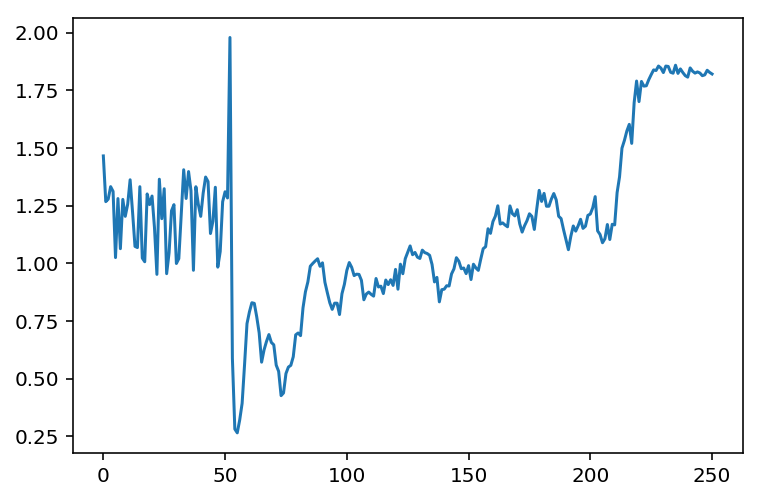

In [108]:
plt.plot(a)

In [123]:
b=np.linspace(0,0,1001)
for i in range(1001):
    b[i]=nolds.corr_dim(exp1[:,i],2)

In [165]:
c=np.linspace(1,9,9)
for i in range(9):
    c[i]=nolds.corr_dim(exp4[i],2)

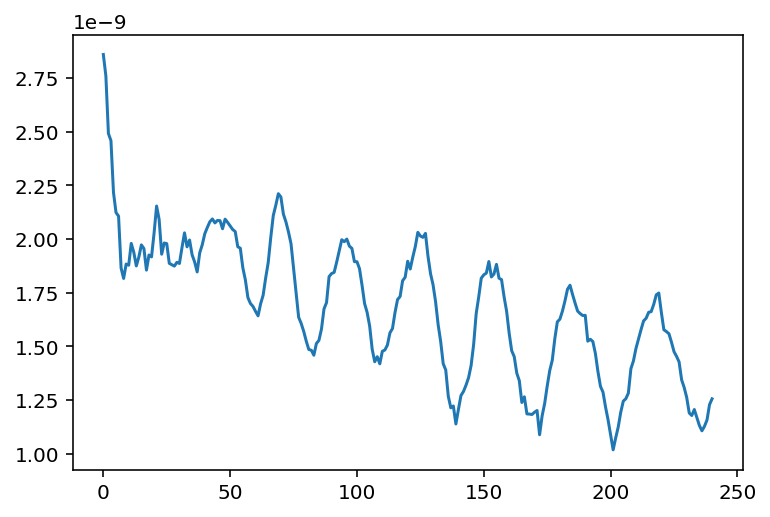

In [173]:
#plt.plot(c)
plt.plot(exp4[1])

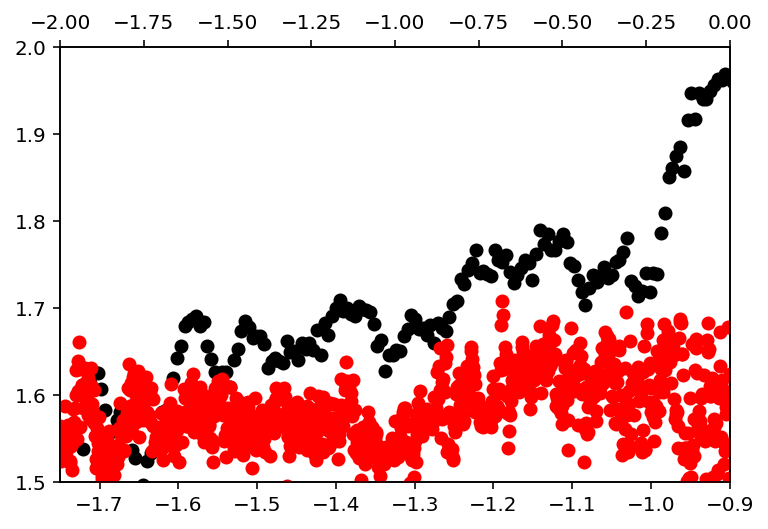

In [155]:
#plt.plot(exp1[:,20])
ax1=plt.subplot(1,1,1)
ax1.set_ylim(1.5,2)

x=np.linspace(-2., -0.8, num=251)
x2=np.linspace(-2, 0, num=1001)
x3=np.linspace(-2, 0, num=1001)
x4=np.linspace(-1.8, -0.8, num=201)
x5=np.linspace(-1.76, -0.8, num=201)
plt.plot(x[55:250],a[55:250]/3+1.35,'ko')
plt.xlim(-1.75,-0.9)
ax2 = ax1.twiny()
plt.plot(x2,b/3+1.35,'ro')
ax2.set_ylim(1.5,2)
ax2.set_xlim(-2,0)
plt.savefig('D:\\fractal.pdf',bbox_inches='tight', format='pdf',dpi=900)

(251, 1001)

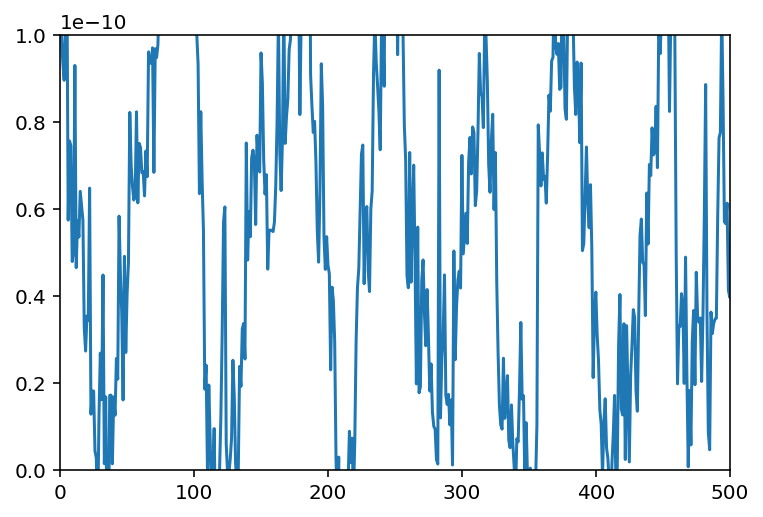

In [57]:
plt.plot(exp1[150])
plt.xlim(0,500)
plt.ylim(0,1E-10)
exp1.shape

In [58]:
L = 1001
rate = L / 6.0
#N = scipy.stats.poisson( rate ).rvs()
U = exp1[25]


In [59]:
def count_boxes( data, box_size, M ):
    data = Series( data )
    N = np.int( np.floor( M / box_size ) )
    counts = list()
    for i in range( N ):
        condition = ( data >= i*box_size )&( data < (i+1)*box_size )
        subset = data[ condition ]
        counts.append( subset.count() )
    counts = [ i for i in counts if i != 0 ]
    return len( counts )
 
r = np.array([ L/(2.0**i) for i in range(12,0,-1) ])
N = [ count_boxes( U, ri, L ) for ri in r ]


In [60]:
import statsmodels.formula.api as sm
 
Y = np.log( N )
X = np.log( 1./r )
T = np.vstack((Y,X,np.ones_like(X))).T
 
df = DataFrame( T, columns=['N(r)','Df','A'] )
Y = df['N(r)']
X = df[['Df','A']]
result = sm.OLS( Y, X ).fit()
result.summary()

C:\Users\platonov\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
C:\Users\platonov\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\platonov\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1432: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
C:\Users\platonov\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\platonov\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\platonov\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: Ru

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   N(r)   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 17 Jul 2017   Prob (F-statistic):                nan
Time:                        13:58:13   Log-Likelihood:                    inf
No. Observations:                  12   AIC:                              -inf
Df Residuals:                      10   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Df                  0          0        nan        nan           0           0
A                   0          0        nan        nan           0           0
==============================================================================
Omnibus:                        1.064   Durbin-Watson:                     nan
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                4.500
Skew:                           0.000   Prob(JB):                        0.105
Kurtosis:                       0.000   Cond. No.                         5.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""